# **Market_Segmentation_Analysis_for_McDonald-s**

McDonald's might operate under the assumption that their offerings meet the needs of all customers uniformly, or they could acknowledge the benefits of discerning customer distinctions and leverage these insights to enhance their marketing tactics.

**Step 2:**

Identifying Target Market Segments

McDonald's management must precisely identify characteristics that make a market segment attractive and viable for targeted marketing efforts. The chosen target segment should fulfill the following criteria:

Homogeneity: The segment should consist of customers with similar needs and preferences.
Distinctiveness: The segment should be clearly distinct from other market segments in terms of consumer behavior and attributes.
Sufficient Size: The segment must be large enough to justify customized marketing strategies and expenditures.
Receptiveness to Fast Food: The segment should have a positive inclination towards fast food consumption.
Accessibility: The segment should be easily identifiable and reachable through marketing channels.
Attractiveness Factors:

Brand Affinity: Preference for McDonald’s over competitors.
Dining Frequency: Regularity of dining out, with a specific focus on fast food consumption.
Potential for Brand Perception Shift: Targeting segments that are currently less favorable towards the brand to alter and enhance their perception.
The criteria for segmentation are primarily based on the level of affinity for McDonald’s and the frequency of visits, given the constraints of available data.

**Step 3:**

Data Collection

Data was gathered from a diverse group of 1,453 adult consumers in Australia, focusing on their perceptions of McDonald's attributes. Key attributes evaluated included factors like "YUMMY," "CONVENIENT," and "SPICY," with respondents providing binary YES or NO responses. Demographic information such as AGE and GENDER was also collected, offering foundational insights into the customer base.

Suggestions for Enhanced Data Collection:

Dining Behavior: Collecting detailed data on customers' dining habits can provide deeper insights into when and how often they choose McDonald's over other dining options.
Information Sources: Understanding what influences these consumers’ dining decisions (e.g., advertisements, peer recommendations, online reviews) can further refine the segmentation strategy, allowing McDonald’s to tailor its marketing communications more effectively.

Importing Libraries

In [ ]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import seaborn as sns  # Visualization library for statistical graphics
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
!pip install bioinfokit
!pip install yellowbrick

Importing Dataset

In [ ]:
#Loading the dataset
df = pd.read_csv("mcdonalds.csv")
df.shape
df.head()
df.dtypes
# 11 variable(cols) has yes or no values.

# checking for null data --> No null data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
#Checking for the count of below variables
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


Exploratory Data Analysis

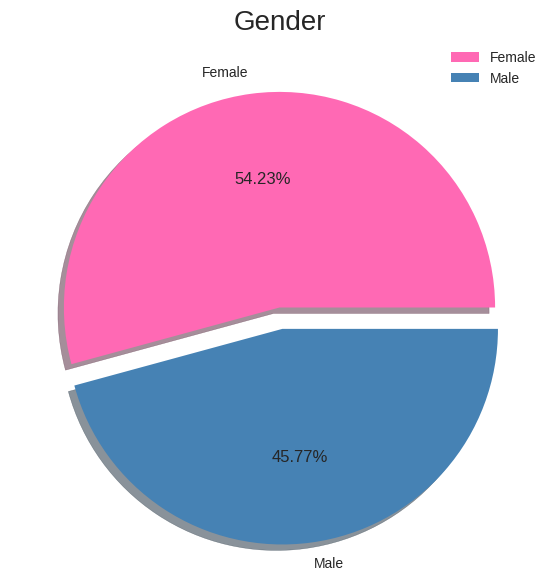

<ipython-input-68-d4ac8618f14c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=df['Age'], palette=custom_palette)
<ipython-input-68-d4ac8618f14c>:27: UserWarning: 
The palette list has fewer values (12) than needed (54) and will cycle, which may produce an uninterpretable plot.
  f = sns.countplot(x=df['Age'], palette=custom_palette)


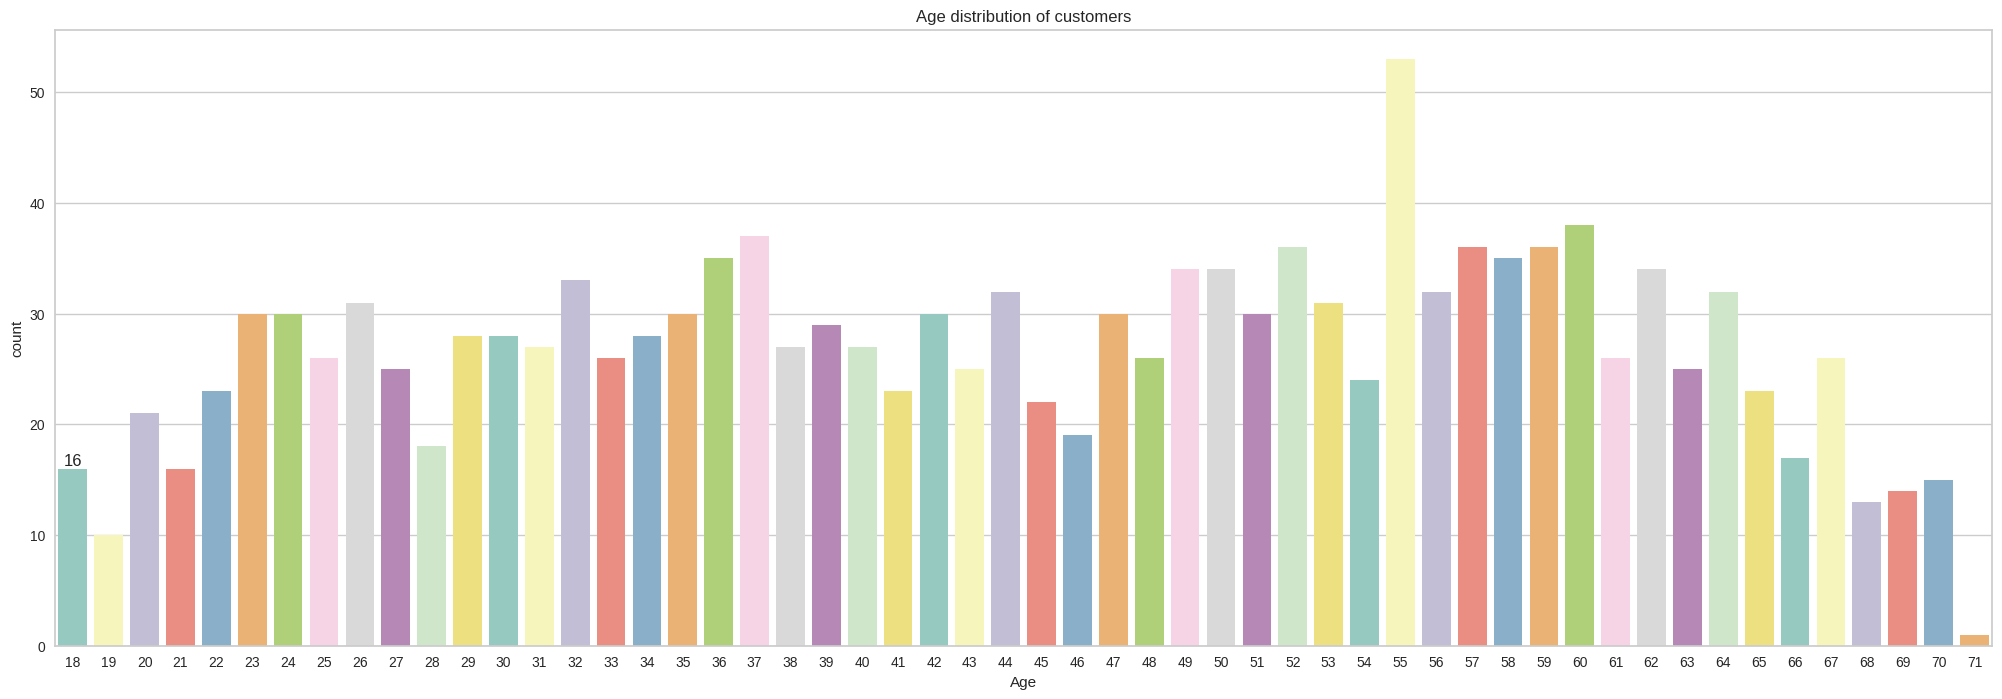

In [ ]:
#EXPLORING DATA

#Customer segmentation - based on socio-demographs (Age & Gender)


# Pie chart for Gender distribution
labels = ['Female', 'Male']
size = df['Gender'].value_counts()

# Custom colors for pie chart
colors = ['#FF69B4', '#4682B4']  # Bright Pink for Female and Steel Blue for Male
explode = [0, 0.1]  # Emphasize Male by "exploding" it

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')  # Hide axis
plt.legend()
plt.show()

# Bar plot for Age distribution
plt.rcParams['figure.figsize'] = (25, 8)

# Custom color palette for the bar plot
custom_palette = sns.color_palette("Set3")  # Use Set3 color palette for softer colors

f = sns.countplot(x=df['Age'], palette=custom_palette)
f.bar_label(f.containers[0])

plt.title('Age distribution of customers')
plt.show()

# Mcdonalds recieve more customers of age between 50-60 and 35-40.

<ipython-input-69-1c9c634bb0f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Like", y="Age", data=df,


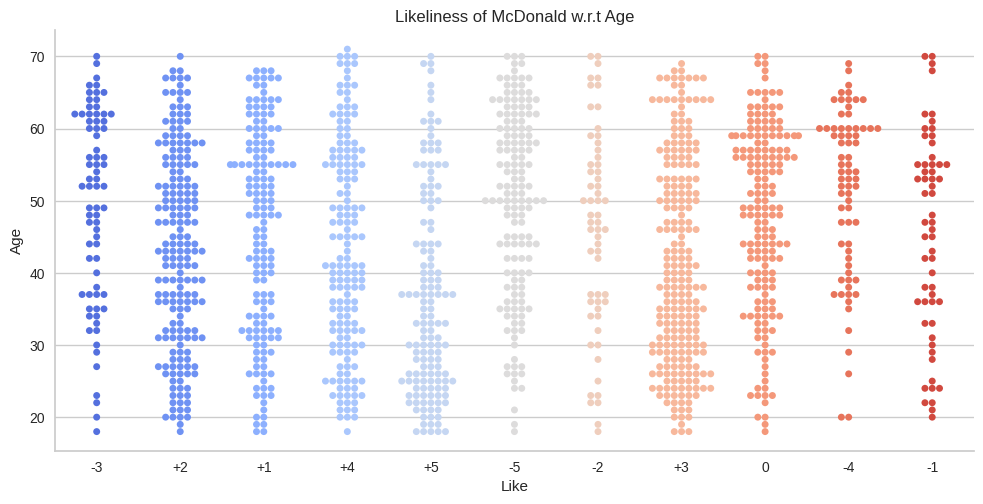

In [ ]:
#Customer segmentation - based on pyschographic segmentation

# For convenience, renaming the category
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Like (Swarmplot)
sns.catplot(x="Like", y="Age", data=df,
            orient="v", height=5, aspect=2, palette="coolwarm", kind="swarm")

plt.title('Likeliness of McDonald w.r.t Age')
plt.show()


In [ ]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


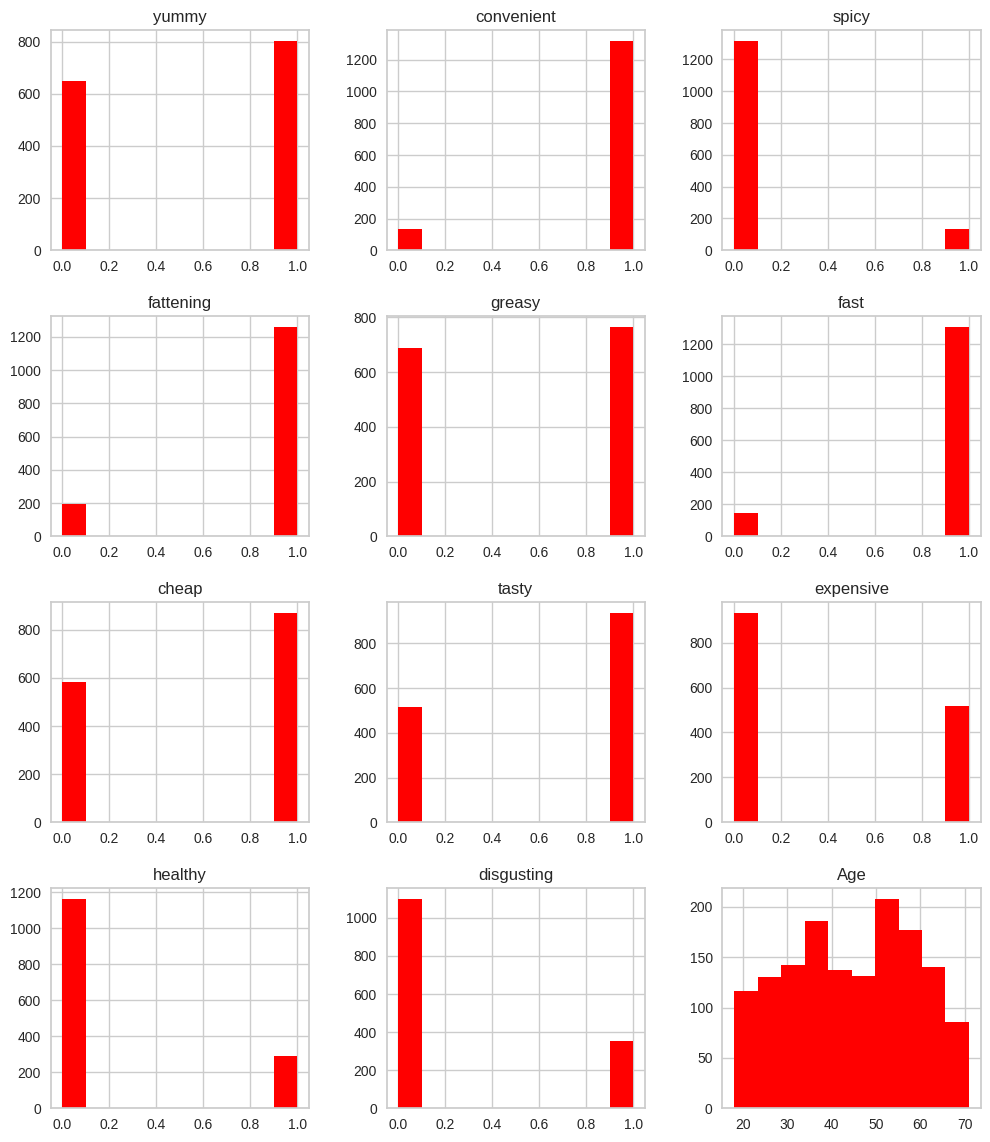

In [ ]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12, 14)

# Generating histograms with custom color
df.hist(color='red')

plt.show()


In [ ]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [ ]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [ ]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [ ]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


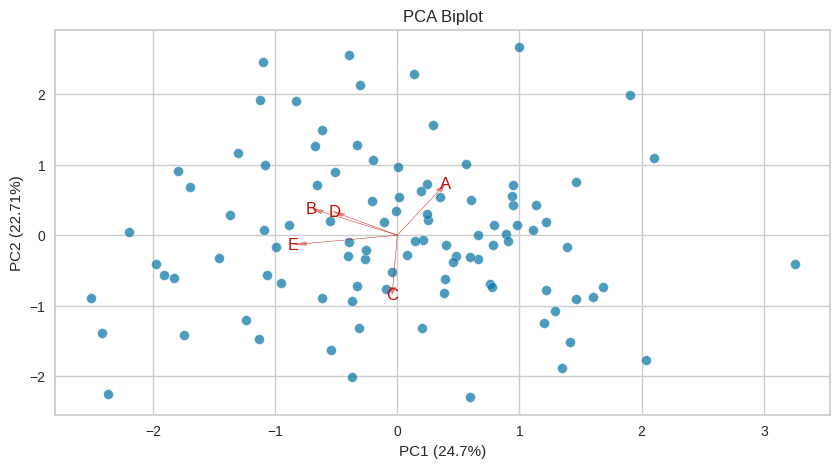

NameError: name 'cluster' is not defined

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplotimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (replace with your actual data)
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Standardize the data
x = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(x)

# Get PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the biplot
plt.figure(figsize=(10, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, edgecolors='w', s=50)

for i, var in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='r', ha='center', va='center')

plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

Extracting Segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

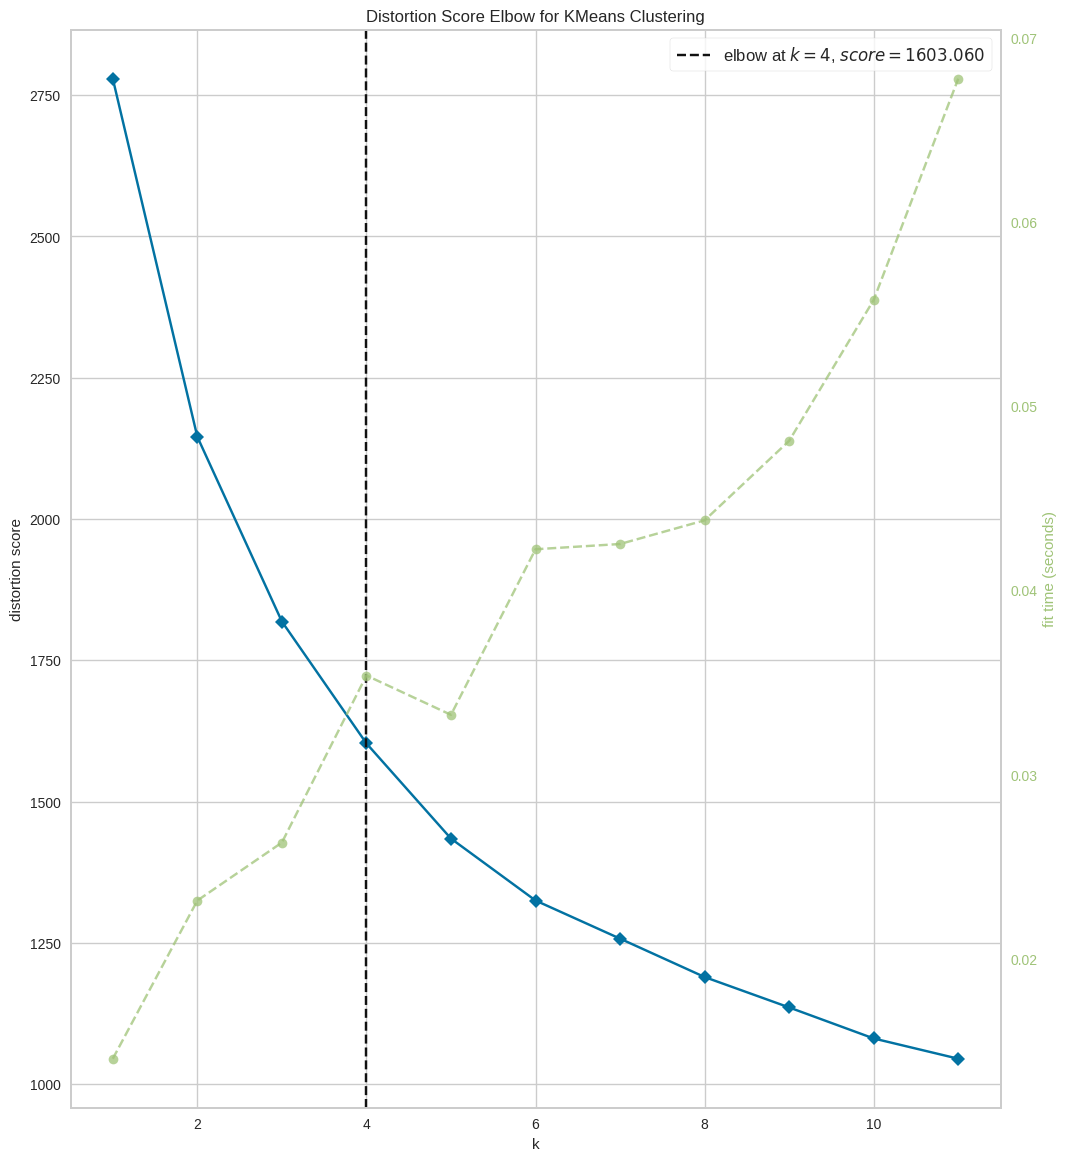

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

K-Means Clustering

In [ ]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 2 2 ... 2 1 3]
1602.930345747211
9
[[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 309, 2: 324, 1: 580, 3: 240})

Visualizing Clusters

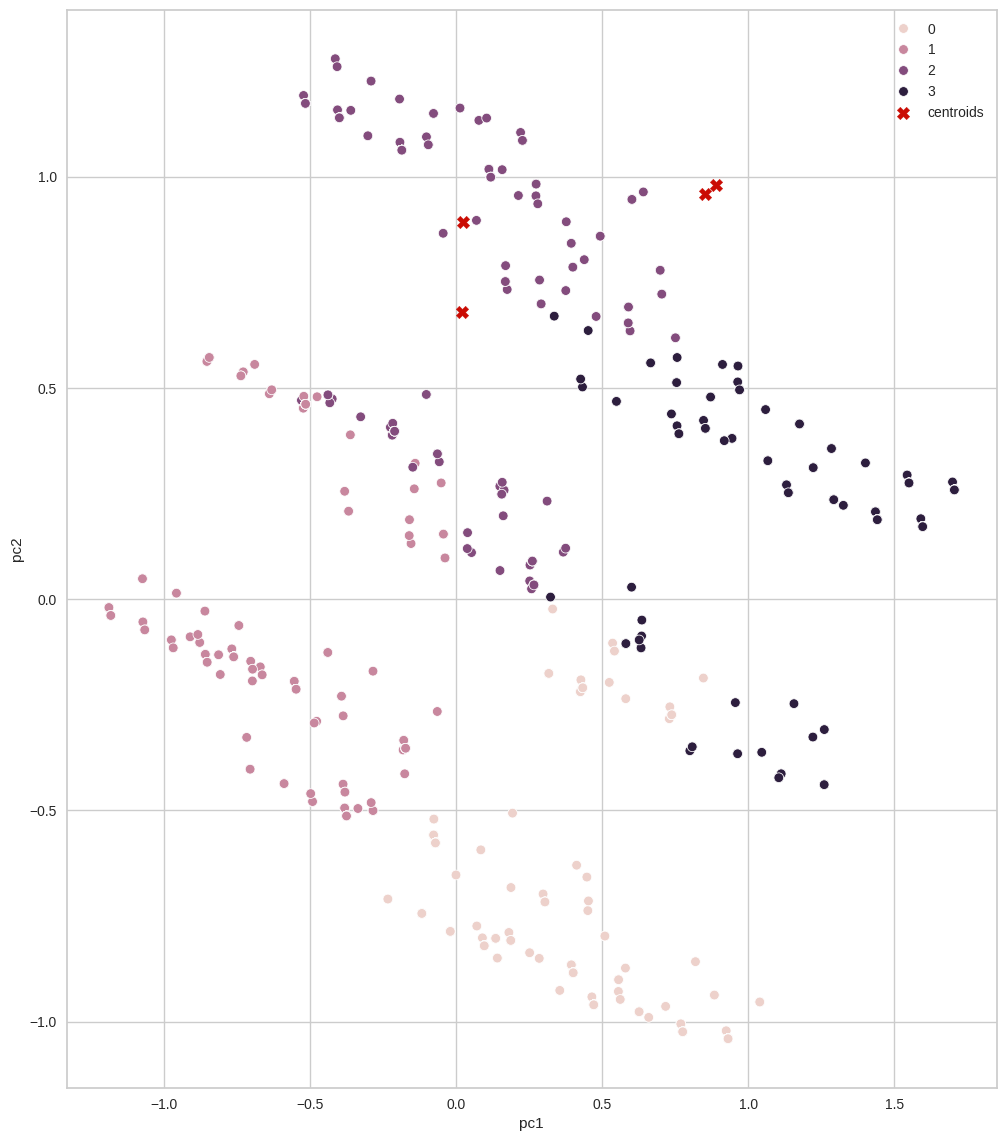

In [ ]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

Describing Segments

In [ ]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,54,36,34,29,26,53,32,31,12,2,0
1,4,4,2,6,13,43,65,90,143,111,99
2,5,4,7,6,7,36,42,60,66,47,44
3,89,27,30,18,12,37,13,6,8,0,0


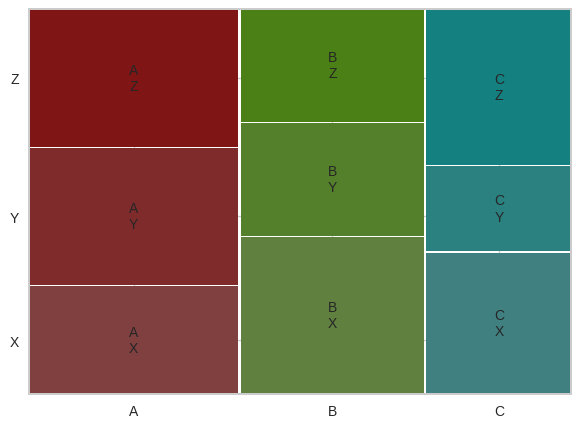

In [ ]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [ ]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,183,126
1,349,231
2,155,169
3,101,139


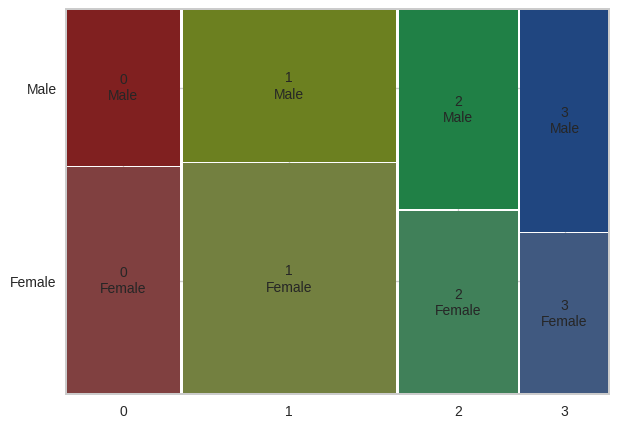

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

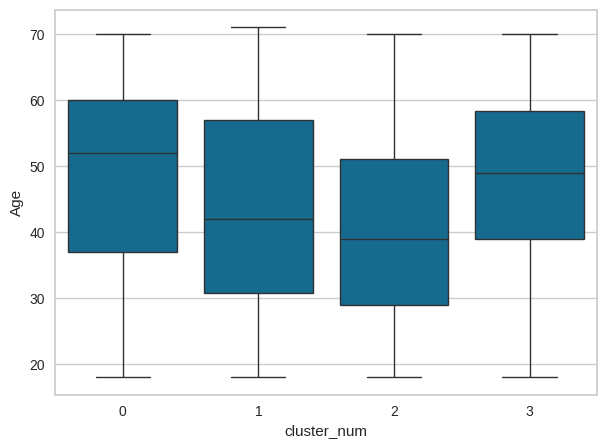

In [ ]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [ ]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [ ]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.171521
1,1,2.962069
2,2,3.290123
3,3,7.445833


In [ ]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.407767,6.171521,2.809061
1,1,0.398276,2.962069,2.584483
2,2,0.521605,3.290123,2.540123
3,3,0.579167,7.445833,2.679167


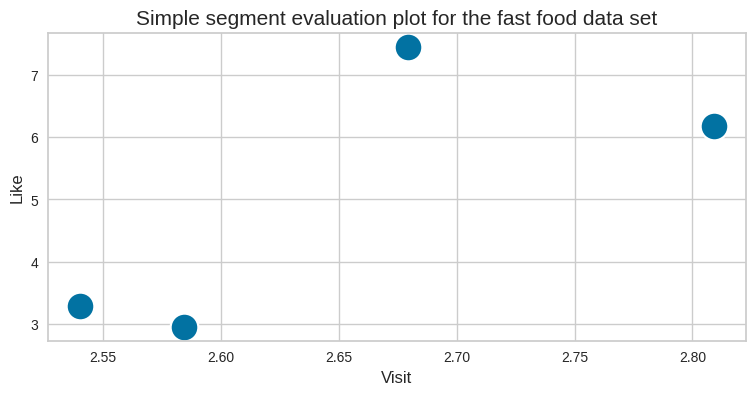

In [ ]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="b")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

### Step 9: Customizing the Marketing Mix

**Target Audience**: Concentrate on the young demographic (Segment 3) who favor McDonald's offerings but prioritize affordability.

**Product Strategy**: Launch a "McVALUE" menu that offers items at reduced prices, making it more accessible to budget-conscious consumers.

**Long-Term Vision**: Aim to transform price-sensitive patrons into dedicated customers, gradually enticing them to explore broader menu options.

**Enhancing the McVALUE Proposition**:
- **Simplicity in Selection**: Provide well-loved classics with minimal modifications, such as burgers with single patties.
- **Bundled Value Meals**: Combine menu items with beverages and small fries for cost-effective meal options.
- **Distinctive Branding**: Utilize unique packaging to set the McVALUE items apart from other menu options.

### Step 10: Evaluation and Monitoring

Upon concluding the market segmentation analysis and the rollout of targeted marketing initiatives, it is crucial to assess their effectiveness and maintain ongoing surveillance of the market dynamics. Customer profiles within segments, like those of Segment 3, might evolve over time, potentially moving beyond the target range for the MCSUPERBUDGET category due to increased earnings. Additionally, new competitors might disrupt the market equilibrium. It is imperative for McDonald's to continuously track these changes to identify shifts that could necessitate recalibrations in their marketing strategies or tactical approaches.